In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Health_cleaned.csv')
df.shape

(170761, 48)

In [3]:
df_without_missed_ragey_b = df[df['ragey_b'] != '.m'];
df_without_missed_ragey_b['ragey_b'] = df_without_missed_ragey_b['ragey_b'].astype(int);

median_age_by_wave = df_without_missed_ragey_b.groupby('index_wave')['ragey_b'].median();

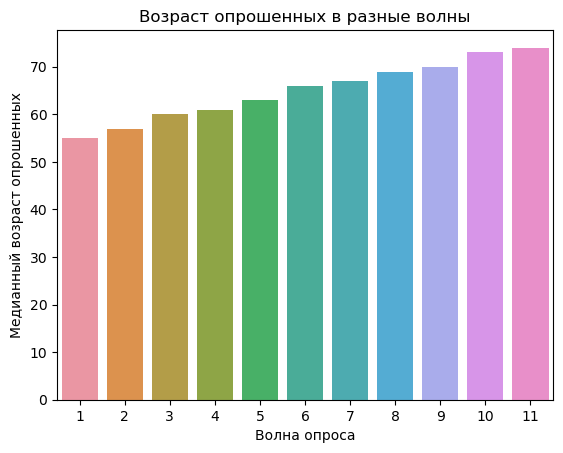

In [4]:
# make bar plot of median_age_by_wave sns
sns.barplot(x=median_age_by_wave.index, y=median_age_by_wave.values)

plt.title('Возраст опрошенных в разные волны')
plt.xlabel('Волна опроса')
plt.ylabel('Медианный возраст опрошенных')

plt.show()

In [5]:
birth_year_by_id = df.groupby('hhidpn')['year_of_birth'].unique()

# iterate through birth_year_by_id and get the first value
birth_year_by_id = birth_year_by_id.apply(lambda x: x[0])

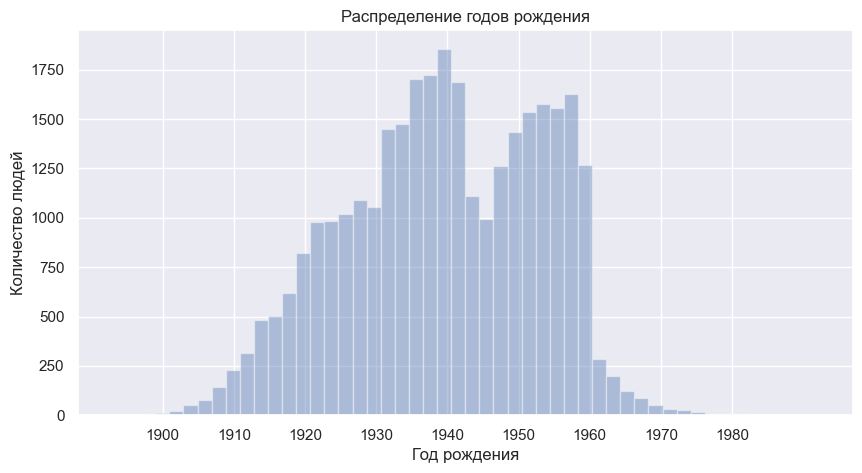

In [7]:
# bar plot of birth_year_by_id
plt.figure(figsize=(10, 5))
sns.set()

sns.distplot(birth_year_by_id.values, kde=False);

plt.xticks(np.arange(1900, 1981, 10))

plt.title('Распределение годов рождения')
plt.xlabel('Год рождения')
plt.ylabel('Количество людей')

plt.show()

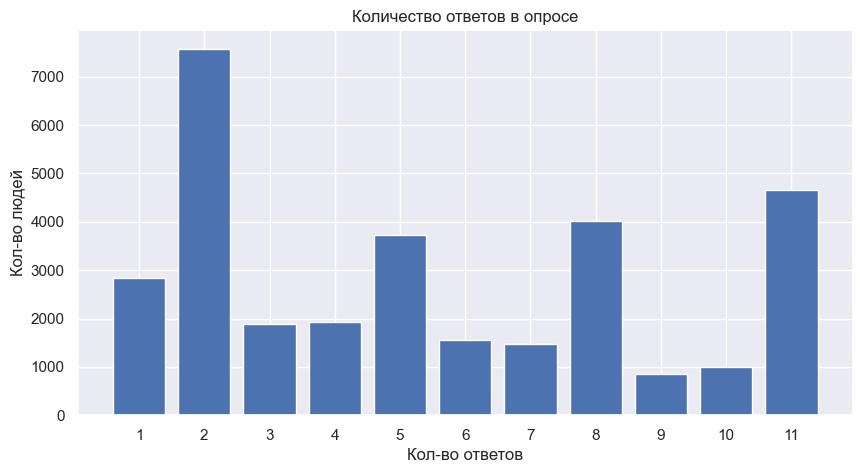

In [8]:
amount_of_answers_by_respondent = df['hhidpn'].value_counts()
amount_of_anwers = amount_of_answers_by_respondent.groupby(amount_of_answers_by_respondent).count()

plt.figure(figsize=(10, 5))

plt.bar(amount_of_anwers.index, amount_of_anwers.values)

plt.xticks(np.arange(1, 12, 1))

plt.title('Количество ответов в опросе')
plt.xlabel('Кол-во ответов')
plt.ylabel('Кол-во людей')

plt.show()

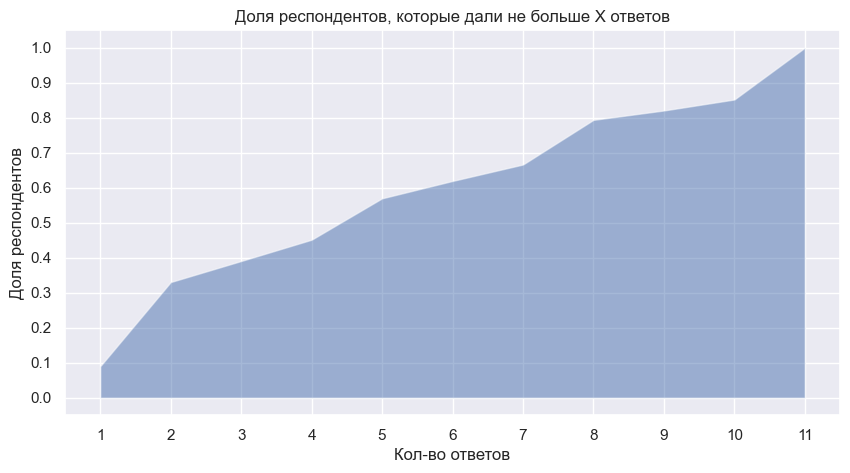

In [9]:
# cumulative distribution function of amount_of_anwers
plt.figure(figsize=(10, 5))

plt.fill_between(amount_of_anwers.index, amount_of_anwers.values.cumsum() / amount_of_anwers.values.sum(),
                 alpha=0.5)

plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.title('Доля респондентов, которые дали не больше X ответов')
plt.xlabel('Кол-во ответов')
plt.ylabel('Доля респондентов')

plt.show()

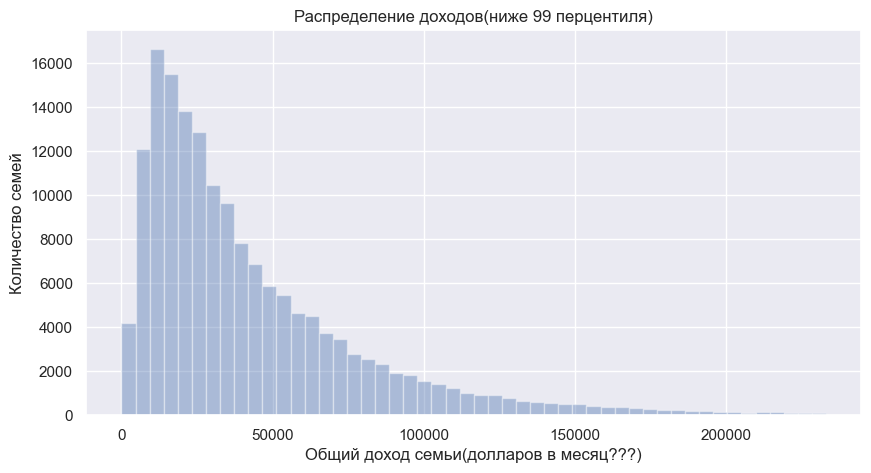

In [13]:
# hist of total_income
q95 = df['total_income'].quantile(0.99)
valid_income = df[(df['total_income'] > 0) & (df['total_income'] < q95)]['total_income']

plt.figure(figsize=(10, 5))

sns.distplot(valid_income.values, kde=False)

plt.title('Распределение доходов(ниже 99 перцентиля)')
plt.xlabel('Общий доход семьи(долларов в год)')
plt.ylabel('Количество семей')

plt.show()